In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import os
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
data_dir = "/content/drive/MyDrive/THÙNG CARTON"
image_size = (128, 128)

images = []
labels = []
label_map = {}
class_id = 0

def normalize_unicode(text):
    return unicodedata.normalize('NFC', text.strip())

for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if os.path.isdir(folder_path):
        norm_label = normalize_unicode(folder_name)
        if norm_label not in label_map:
            label_map[norm_label] = class_id
            class_id += 1

        for image_name in os.listdir(folder_path):
            if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(folder_path, image_name)
                try:
                    img = Image.open(image_path).convert('RGB').resize(image_size)
                    img = np.array(img)
                    images.append(img)
                    labels.append(label_map[norm_label])
                except Exception as e:
                    print(f"Lỗi ảnh: {image_path} - {e}")

images = np.array(images).astype('float32') / 255.0
labels = np.array(labels)

print("label_map:", label_map)
print("images.shape:", images.shape)
print("labels.shape:", labels.shape)


label_map: {'Đạt': 0, 'Không Đạt': 1}
images.shape: (22, 128, 128, 3)
labels.shape: (22,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

num_classes = len(label_map)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=8, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6066 - loss: 1.0656 - val_accuracy: 0.4000 - val_loss: 0.7144
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.4715 - loss: 0.6423 - val_accuracy: 0.4000 - val_loss: 0.7114
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5009 - loss: 0.7095 - val_accuracy: 0.6000 - val_loss: 0.6683
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6829 - loss: 0.6601 - val_accuracy: 0.6000 - val_loss: 0.6505
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6066 - loss: 0.6527 - val_accuracy: 0.6000 - val_loss: 0.6628
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8787 - loss: 0.6049 - val_accuracy: 0.6000 - val_loss: 0.6979
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6048 - loss: 0.7155 - val_accuracy: 0.6000 - val_loss: 0.6169
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6811 - loss: 0.6039 - val_accuracy: 0.8000 - val_loss: 0.5571
Ep

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Độ chính xác : {acc*100:.2f}%")

model.save("carton_model.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8000 - loss: 0.6964


Độ chính xác : 80.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

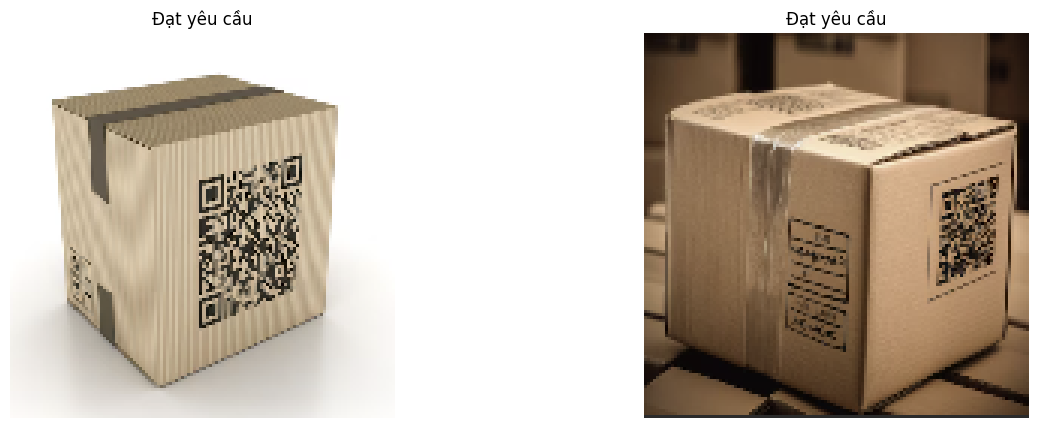

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

from keras.models import load_model

model = load_model('carton_model.h5')

img1 = image.load_img('/content/drive/MyDrive/THÙNG CARTON/Đạt/1.png', target_size=(128, 128))
img2 = image.load_img('/content/drive/MyDrive/THÙNG CARTON/Đạt/2.png', target_size=(128, 128))

img_array1 = image.img_to_array(img1) / 255
img_array2 = image.img_to_array(img2) / 255

img_flatten1 = img_array1.reshape((1, 128, 128, 3))
img_flatten2 = img_array2.reshape((1, 128, 128, 3))

prediction1 = model.predict(img_flatten1)
prediction2 = model.predict(img_flatten2)

class_names_list = ['Đạt yêu cầu','Không đạt yêu cầu']
predicted_index1 = np.argmax(prediction1)
predicted_index2 = np.argmax(prediction2)
predicted_index3 = np.argmax(prediction3)
predicted_index4 = np.argmax(prediction4)
predicted_class1 = class_names_list[predicted_index1]
predicted_class2 = class_names_list[predicted_index2]



plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title(predicted_class1)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title(predicted_class2)
plt.axis('off')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

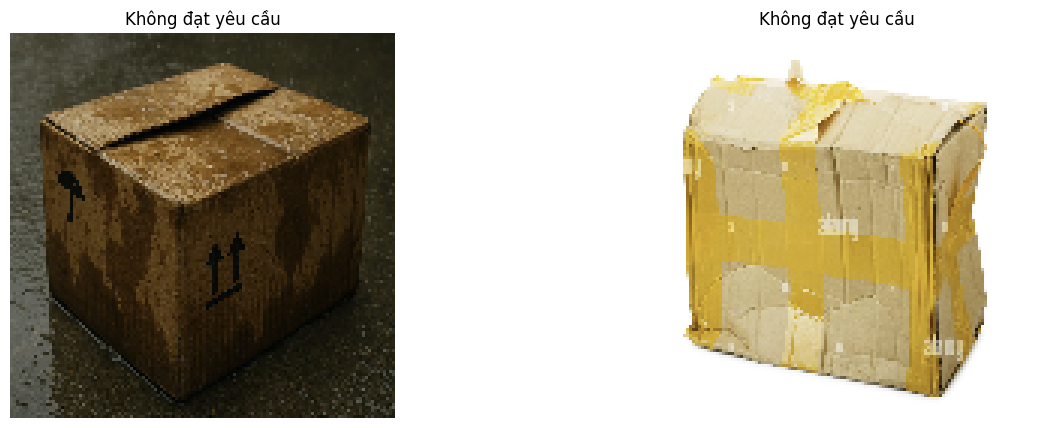

In [ ]:

img1 = image.load_img('/content/drive/MyDrive/THÙNG CARTON/Không Đạt/4.png', target_size=(128, 128))
img2 = image.load_img('/content/drive/MyDrive/THÙNG CARTON/Không Đạt/6.png', target_size=(128, 128))

img_array1 = image.img_to_array(img1) / 255
img_array2 = image.img_to_array(img2) / 255

img_flatten1 = img_array1.reshape((1, 128, 128, 3))
img_flatten2 = img_array2.reshape((1, 128, 128, 3))

prediction1 = model.predict(img_flatten1)
prediction2 = model.predict(img_flatten2)

class_names_list = ['Đạt yêu cầu','Không đạt yêu cầu']
predicted_index1 = np.argmax(prediction1)
predicted_index2 = np.argmax(prediction2)
predicted_index3 = np.argmax(prediction3)
predicted_index4 = np.argmax(prediction4)
predicted_class1 = class_names_list[predicted_index1]
predicted_class2 = class_names_list[predicted_index2]



plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title(predicted_class1)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title(predicted_class2)
plt.axis('off')